# RRT Data Analyses

## Contents:
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Datasets](#Datasets)
- [Loading of Libraries](#Loading-of-Libraries) 
- [Dataset Preparation and Preprocessing](#Dataset-Preparation-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

To conduct data analyses on the total number of RRT activations based on fiscal year 2019 - 2020 (April 2019 - March 2021).

## Background

Failures in planning and communication, and failure to recognize when a patient's condition is deteriorating, can lead to failure to rescue and become a key contributor to in-hospital mortality. If identified in a timely fashion, unnecessary deaths can often be prevented. The [Rapid Response Team (RRT)](https://www.ihi.org/Topics/RapidResponseTeams/Pages/default.aspx#:~:text=The%20Rapid%20Response%20Team%20%E2%80%94%20known,(or%20wherever%20it's%20needed).) — known by some as the Medical Emergency Team — is a team of clinicians who bring critical care expertise to the bedside. Simply put, the purpose of the Rapid Response Team is to bring critical care expertise to the patient bedside (or wherever it’s needed).

## Datasets

Below are the two given documents used in this data analyses:
- `SICU and MICU Triage Notes.csv`
- `Outcome of Patient.csv`

The above documents have been merged into one and saved as `masterfile.csv`.

## Loading of Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

## Dataset Preparation and Preprocessing
- Load dataset
- Check for missing values
- Rename columns
- Format columns to reflect the correct data types
- Save and export

#### Triage dataset

In [2]:
# Load dataset
triage = pd.read_csv('SICU and MICU Triage Notes.csv')
print(triage.shape)
triage.head()

(3326, 6)


,Case No,Document Name,Authored Date,Authored Time,SGH_Disposition,SGH_Time_Referred
0,5690G,MICU Triage Note SGH,10/7/2020,10:06:00,Iso ICU,08:38
1,4269F,MICU Triage Note SGH,12/28/2020,17:02:00,GW,16:04
2,1225E,MICU Triage Note SGH,9/30/2020,09:07:00,GW,08:48
3,6166C,MICU Triage Note SGH,3/11/2021,03:50:00,Iso ICU,02:55
4,2285D,MICU Triage Note SGH,1/26/2021,14:52:00,MICA,14:52


In [3]:
# Check for missing values
triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case No            3326 non-null   object
 1   Document Name      3326 non-null   object
 2   Authored Date      3326 non-null   object
 3   Authored Time      3326 non-null   object
 4   SGH_Disposition    3326 non-null   object
 5   SGH_Time_Referred  3326 non-null   object
dtypes: object(6)
memory usage: 156.0+ KB


In [4]:
# Rename columns
triage.rename(columns={'Case No':'case_no', 
                       'Document Name':'document_name', 
                       'Authored Date': 'authored_date', 
                       'Authored Time':'authored_time', 
                       'SGH_Disposition':'sgh_disposition', 
                       'SGH_Time_Referred':'sgh_time_referred'}, inplace=True)

In [5]:
# Format authored date and time to reflect the correct datatype
triage['authored_date_time'] = triage['authored_date'] + ' ' + triage['authored_time']
triage['authored_date_time'] = pd.to_datetime(triage['authored_date_time'])

In [6]:
# Format time referred to reflect the correct datatype
triage['sgh_time_referred'] = triage['authored_date'] + ' ' + triage['sgh_time_referred']
triage['sgh_time_referred'] = pd.to_datetime(triage['sgh_time_referred'])

In [7]:
# Drop columns
triage.drop(['authored_date', 'authored_time'], axis=1, inplace=True)

In [8]:
# Check changes
triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case_no             3326 non-null   object        
 1   document_name       3326 non-null   object        
 2   sgh_disposition     3326 non-null   object        
 3   sgh_time_referred   3326 non-null   datetime64[ns]
 4   authored_date_time  3326 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 130.0+ KB


In [9]:
triage.head()

,case_no,document_name,sgh_disposition,sgh_time_referred,authored_date_time
0,5690G,MICU Triage Note SGH,Iso ICU,2020-10-07 08:38:00,2020-10-07 10:06:00
1,4269F,MICU Triage Note SGH,GW,2020-12-28 16:04:00,2020-12-28 17:02:00
2,1225E,MICU Triage Note SGH,GW,2020-09-30 08:48:00,2020-09-30 09:07:00
3,6166C,MICU Triage Note SGH,Iso ICU,2021-03-11 02:55:00,2021-03-11 03:50:00
4,2285D,MICU Triage Note SGH,MICA,2021-01-26 14:52:00,2021-01-26 14:52:00


- There are no missing values.
- Column names have been changed.
- Columns have been formatted to reflect the correct data types.

#### Outcome dataset

In [10]:
# Load dataset
outcome = pd.read_csv('Outcome of Patient.csv')
print(outcome.shape)
outcome.head()

(2872, 2)


,Case No,Discharge Type Description
0,1049E,Death
1,8404B,Follow-up at SOC
2,7861A,Follow-up at SOC
3,8698C,Follow-up at SOC
4,2898H,Follow-up at SOC


In [11]:
# Check for missing values
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case No                     2872 non-null   object
 1   Discharge Type Description  2872 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


In [12]:
# Rename columns
outcome.rename(columns={'Case No':'case_no', 
                       'Discharge Type Description':'discharge_type_description'}, inplace=True)

In [13]:
# Check changes
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   case_no                     2872 non-null   object
 1   discharge_type_description  2872 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


In [14]:
outcome.head()

,case_no,discharge_type_description
0,1049E,Death
1,8404B,Follow-up at SOC
2,7861A,Follow-up at SOC
3,8698C,Follow-up at SOC
4,2898H,Follow-up at SOC


- There are no missing values.
- Column names have been changed.
- Columns reflect the correct data types.

#### Merge datasets

In [15]:
# Inner merge on case_no column
masterfile = triage.merge(outcome, how='inner', on='case_no')
print(masterfile.shape)
masterfile.head()

(3385, 6)


,case_no,document_name,sgh_disposition,sgh_time_referred,authored_date_time,discharge_type_description
0,5690G,MICU Triage Note SGH,Iso ICU,2020-10-07 08:38:00,2020-10-07 10:06:00,Patient Discharged
1,4269F,MICU Triage Note SGH,GW,2020-12-28 16:04:00,2020-12-28 17:02:00,Follow-up at SOC
2,1225E,MICU Triage Note SGH,GW,2020-09-30 08:48:00,2020-09-30 09:07:00,Follow-up at SOC
3,6166C,MICU Triage Note SGH,Iso ICU,2021-03-11 02:55:00,2021-03-11 03:50:00,Death
4,6166C,MICU Triage Note SGH,MICU,2019-05-22 15:43:00,2019-05-22 16:18:00,Death


In [16]:
# Check time period in dataset
print(f'earliest time: {masterfile["authored_date_time"].min()}')
print(f'latest time: {masterfile["authored_date_time"].max()}')

earliest time: 2019-04-01 05:41:00
latest time: 2021-03-31 16:55:00


The dataset contains data within the required fiscal year 2019-2020 (April 2019 - March 2021).

In [17]:
# Save and export
masterfile.to_csv('masterfile.csv')

## Exploratory Data Analysis
1. Total Number of RRT Activations by Month
1. Total Number of RRT Activations by Teams and Month
1. Total Number of RRT Activations by Time
1. Total Number of RRT Activations by Disposition
1. Total Number of RRT Activations by Outcome

#### 1. Total Number of RRT Activations by Month

In [18]:
# Aggregate to find total number of RRT activations by month
# Prepare dataframe for plotting
monthly_count = masterfile['authored_date_time'].groupby(masterfile.authored_date_time.dt.to_period("M")).agg('count').to_frame(name='count')
monthly_count['month'] = monthly_count.index.month
monthly_count['month'] = monthly_count['month'].apply(lambda x: calendar.month_name[x])
monthly_count['year'] = monthly_count.index.year
monthly_count.head()

,count,month,year
authored_date_time,,,
2019-04,138,April,2019
2019-05,161,May,2019
2019-06,151,June,2019
2019-07,169,July,2019
2019-08,143,August,2019


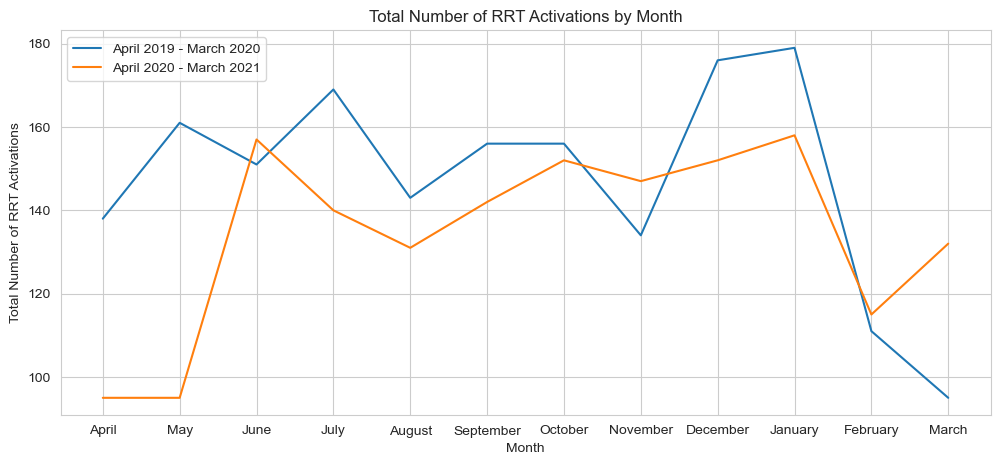

In [19]:
# Plot line graph to show total number of RRT activations by month
# set the order of the months
order = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']

# convert the month column to categorical and set the order of categories
monthly_count['month'] = pd.Categorical(monthly_count['month'], categories=order, ordered=True)

# subset the data for April 2019 to March 2020
df1 = monthly_count[(monthly_count['year'] == 2019) & (monthly_count['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))
         | (monthly_count['year'] == 2020) & (monthly_count['month'].isin(['January', 'February', 'March']))]

# subset the data for April 2020 to March 2021
df2 = monthly_count[(monthly_count['year'] == 2020) & (monthly_count['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))
         | (monthly_count['year'] == 2021) & (monthly_count['month'].isin(['January', 'February', 'March']))]

# set the figure size
plt.figure(figsize=(12, 5))

# create the line plots
sns.set_style("whitegrid")
sns.lineplot(x='month', y='count', data=df1, label='April 2019 - March 2020')
sns.lineplot(x='month', y='count', data=df2, label='April 2020 - March 2021')

# add labels and title
plt.xlabel('Month')
plt.ylabel('Total Number of RRT Activations')
plt.title('Total Number of RRT Activations by Month')

# show the legend
plt.legend()

# show the plot
plt.show()

- There is a somewhat similar trend in the total number of RRT activations across the two fiscal years.
- There is a general increasing trend in the first quarter, followed by smaller fluctuations in the second and third quarters, then a decreasing trend in the last quarter of the fiscal year.
- The peaks in the number of RRT activations are in June/July and December/January periods. These coincide with the main school holiday and festive periods in Singapore. Some patients might face more stress during such [festive periods](https://hbr.org/2018/12/holidays-can-be-stressful-they-dont-have-to-stress-out-your-team) resulting in incidences of serious adverse events and RRT activations. Furthermore, there might be a crunch in the hospital manpower, resulting in [patient deterioration not being recognized and responded to in a timely manner](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5221430/) and subsequent RRT activations.

#### 2. Total Number of RRT Activations by Teams and Month

In [20]:
# Aggregate to find total number of RRT activations by month and teams
# Map document_name to corresponding teams
# Prepare dataframe for plotting
teams_month = masterfile.groupby([masterfile.authored_date_time.dt.to_period("M"), masterfile.document_name]).agg('count')
teams_month['count'] = teams_month['case_no']
teams_month = teams_month[['count']]
teams_month['team'] = teams_month.index.get_level_values('document_name').map(lambda x: 'HERO' if x == 'SICU Triage Note SGH' else 'SMART')
teams_month['month'] = teams_month.index.get_level_values('authored_date_time').month
teams_month['month'] = teams_month['month'].apply(lambda x: calendar.month_name[x])
teams_month['year'] = teams_month.index.get_level_values('authored_date_time').year
teams_month.head()

count   team  month  year
authored_date_time document_name                                  
2019-04            MICU Triage Note SGH    106  SMART  April  2019
                   SICU Triage Note SGH     32   HERO  April  2019
2019-05            MICU Triage Note SGH    119  SMART    May  2019
                   SICU Triage Note SGH     42   HERO    May  2019
2019-06            MICU Triage Note SGH    115  SMART   June  2019

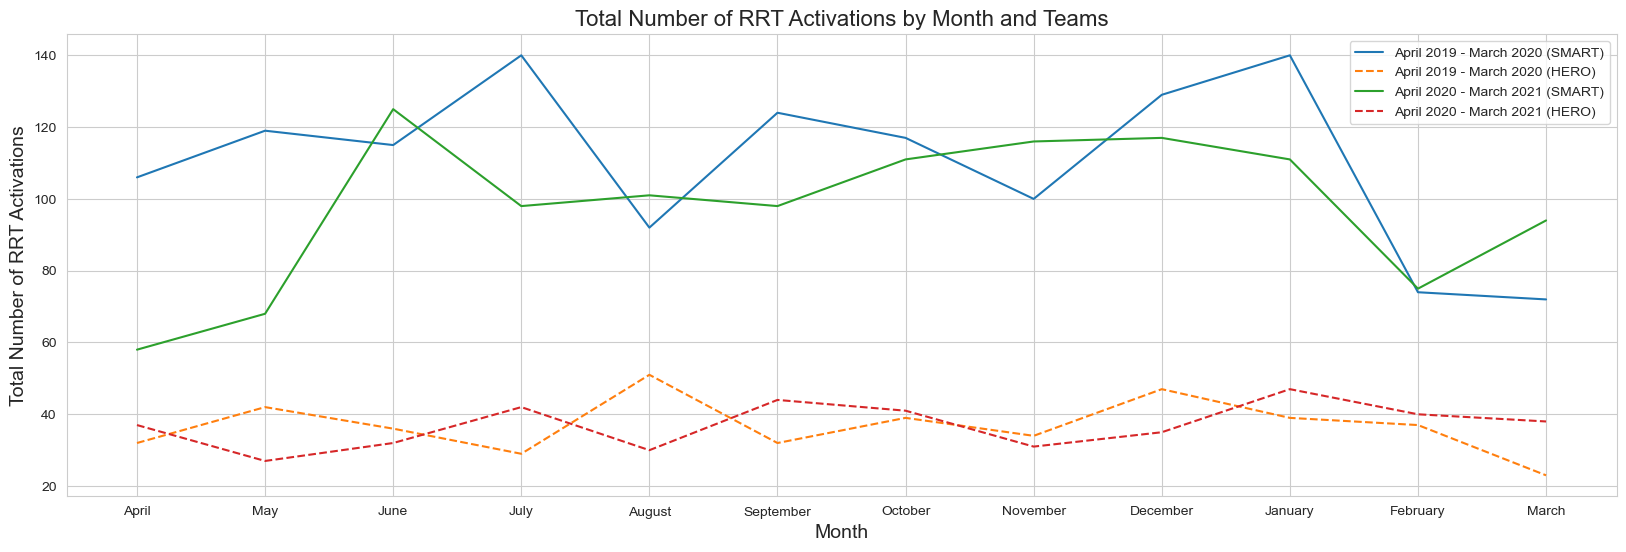

In [21]:
# Plot line graph to show total number of RRT activations by month
# set the order of the months
order = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']

# convert the month column to categorical and set the order of categories
teams_month['month'] = pd.Categorical(teams_month['month'], categories=order, ordered=True)

# subset the data for April 2019 to March 2020 for SMART team
df1 = teams_month[(teams_month['team'] == 'SMART') & ((teams_month['year'] == 2019) & (teams_month['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])))
         | ((teams_month['team'] == 'SMART') & (teams_month['year'] == 2020) & (teams_month['month'].isin(['January', 'February', 'March'])))]

# subset the data for April 2019 to March 2020 for HERO team
df2 = teams_month[(teams_month['team'] == 'HERO') & ((teams_month['year'] == 2019) & (teams_month['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])))
         | ((teams_month['team'] == 'HERO') & (teams_month['year'] == 2020) & (teams_month['month'].isin(['January', 'February', 'March'])))]

# subset the data for April 2020 to March 2021 for SMART team
df3 = teams_month[(teams_month['team'] == 'SMART') & ((teams_month['year'] == 2020) & (teams_month['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])))
         | ((teams_month['team'] == 'SMART') & (teams_month['year'] == 2021) & (teams_month['month'].isin(['January', 'February', 'March'])))]

# subset the data for April 2020 to March 2021 for HERO team
df4 = teams_month[(teams_month['team'] == 'HERO') & ((teams_month['year'] == 2020) & (teams_month['month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])))
         | ((teams_month['team'] == 'HERO') & (teams_month['year'] == 2021) & (teams_month['month'].isin(['January', 'February', 'March'])))]

# set the figure size
plt.figure(figsize=(20, 6))

# create the line plots
sns.set_style("whitegrid")
sns.lineplot(x='month', y='count', data=df1, label='April 2019 - March 2020 (SMART)')
sns.lineplot(x='month', y='count', data=df2, label='April 2019 - March 2020 (HERO)', linestyle='dashed')
sns.lineplot(x='month', y='count', data=df3, label='April 2020 - March 2021 (SMART)')
sns.lineplot(x='month', y='count', data=df4, label='April 2020 - March 2021 (HERO)', linestyle='dashed')

# add labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Number of RRT Activations', fontsize=14)
plt.title('Total Number of RRT Activations by Month and Teams', fontsize=16)

# show the legend
plt.legend(loc='upper right', fontsize=10)

# show the plot
plt.show()

In [22]:
# Finding min and max activations by team
print(f"Lowest number of activations by SMART team: {df3['count'].min()}")
print(f"Highest number of activations by SMART team: {df1['count'].max()}")
print(f"Range in number of activations by SMART team: {df1['count'].max()-df3['count'].min()}")
print(f"Lowest number of activations by HERO team: {df2['count'].min()}")
print(f"Highest number of activations by HERO team: {df2['count'].max()}")
print(f"Range in number of activations by HERO team: {df2['count'].max()-df2['count'].min()}")

Lowest number of activations by SMART team: 58
Highest number of activations by SMART team: 140
Range in number of activations by SMART team: 82
Lowest number of activations by HERO team: 23
Highest number of activations by HERO team: 51
Range in number of activations by HERO team: 28


- There are generally more RRT activations by SMART team as compared to HERO team. As such, it contributes to the total activations to a larger extent.
- The fluctuations in RRT activations are greater for SMART team as compared to HERO team, with the range in the number of activations by SMART team at 82 and that of HERO team at 28.
- There is a somewhat similar trend in the total number of RRT activations across the two fiscal years by SMART team while that by HERO team is more erratic. As such, the conditions of the patients under the HERO team might be more unstable or the team might have [more reluctance in RRT activations](http://www.smj.org.sg/sites/default/files/SMJ-61-184.pdf) and require more training in it.

#### 3. Total Number of RRT Activations by Time

In [24]:
# Create a column to reflect days of the week
masterfile["day_of_week"] = masterfile['authored_date_time'].dt.dayofweek

In [25]:
# List of public holidays
ph = pd.to_datetime([datetime.date(2019, 4, 19), datetime.date(2019, 5, 1), datetime.date(2019, 5, 19), datetime.date(2019, 5, 20), datetime.date(2019, 6, 5), datetime.date(2019, 8, 9), datetime.date(2019, 8, 11), datetime.date(2019, 8, 12), datetime.date(2019, 10, 27), datetime.date(2019, 10, 28), datetime.date(2019, 12, 25), datetime.date(2020, 1, 1), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 4, 10), datetime.date(2020, 5, 1), datetime.date(2020, 5, 7), datetime.date(2020, 5, 24), datetime.date(2020, 5, 25), datetime.date(2020, 7, 31), datetime.date(2020, 8, 9), datetime.date(2020, 8, 10), datetime.date(2020, 11, 14), datetime.date(2020, 12, 25), datetime.date(2021, 1, 1), datetime.date(2021, 2, 12), datetime.date(2021, 2, 13)])
ph_series = pd.Series(ph)
print(ph_series.shape)
ph_series[:5]

(28,)


0   2019-04-19
1   2019-05-01
2   2019-05-19
3   2019-05-20
4   2019-06-05
dtype: datetime64[ns]

In [26]:
# Convert 'authored_date_time' column to a series to check against ph_series
authored_date_time_series = pd.to_datetime(masterfile['authored_date_time'].dt.date)
is_in_ph = authored_date_time_series.isin(ph_series)

In [27]:
# Add boolean column to dataframe
masterfile['is_in_ph'] = is_in_ph

In [30]:
# Create a list of conditions to reflect office and non-office hours
start_time = datetime.time(8,0,0)
weekday_end_time = datetime.time(17,0,0)
sat_end_time = datetime.time(12,0,0)

conditions = [
    (masterfile['day_of_week']<5) & (masterfile['is_in_ph']==False) & (masterfile['authored_date_time'].dt.time>=start_time) & (masterfile['authored_date_time'].dt.time<=weekday_end_time),
    (masterfile['day_of_week']<5) & ((masterfile['is_in_ph']==True) | (masterfile['authored_date_time'].dt.time<start_time) | (masterfile['authored_date_time'].dt.time>weekday_end_time)),
    (masterfile['day_of_week']==5) & (masterfile['is_in_ph']==False) & (masterfile['authored_date_time'].dt.time>=start_time) & (masterfile['authored_date_time'].dt.time<=sat_end_time),
    (masterfile['day_of_week']==5) & ((masterfile['is_in_ph']==True) | (masterfile['authored_date_time'].dt.time<start_time) | (masterfile['authored_date_time'].dt.time>sat_end_time)),
    (masterfile['day_of_week']==6)]

values = ['office', 'non-office', 'office', 'non-office', 'non-office']

masterfile['hours'] = np.select(conditions, values)

masterfile.head()

,case_no,document_name,sgh_disposition,sgh_time_referred,authored_date_time,discharge_type_description,day_of_week,is_in_ph,hours
0,5690G,MICU Triage Note SGH,Iso ICU,2020-10-07 08:38:00,2020-10-07 10:06:00,Patient Discharged,2,False,office
1,4269F,MICU Triage Note SGH,GW,2020-12-28 16:04:00,2020-12-28 17:02:00,Follow-up at SOC,0,False,non-office
2,1225E,MICU Triage Note SGH,GW,2020-09-30 08:48:00,2020-09-30 09:07:00,Follow-up at SOC,2,False,office
3,6166C,MICU Triage Note SGH,Iso ICU,2021-03-11 02:55:00,2021-03-11 03:50:00,Death,3,False,non-office
4,6166C,MICU Triage Note SGH,MICU,2019-05-22 15:43:00,2019-05-22 16:18:00,Death,2,False,office


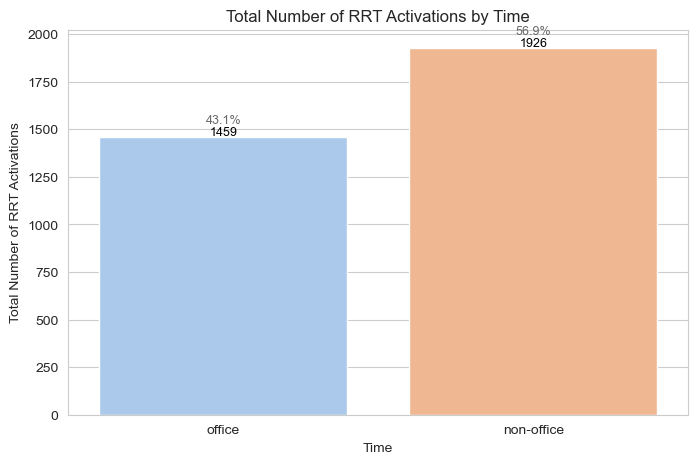

In [74]:
# Plot bar graph to show total number of RRT activations by time
# set the figure size
plt.figure(figsize=(8,5))

# create the bar graphs
sns.set_style("whitegrid")
ax = sns.countplot(data=masterfile, x='hours', palette = 'pastel')

# add count and percentage labels on top of each bar
total = float(len(masterfile))
for patch in ax.patches:
    count = int(patch.get_height())
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y_count = patch.get_y() + patch.get_height() + 10 
    y_percentage = y_count + 60 
    ax.annotate(count, (x, y_count), ha='center', fontsize=9, color='black')
    ax.annotate(percentage, (x, y_percentage), ha='center', fontsize=9, color='dimgray')

# add labels and title
plt.xlabel('Time')
plt.ylabel('Total Number of RRT Activations')
plt.title('Total Number of RRT Activations by Time')

# show the plot
plt.show()

- There are more RRT activations during non-office hours (56.9%) than office hours (43.1%). Below are a few plausible reasons:
  - Non-office hours are proportionally longer than office hours in a day.
  - There is less manpower in the hospital during non-office hours, resulting in patient deterioration not being recognized and responded to in a timely manner and subsequent RRT activations.

#### 4. Total Number of RRT Activations by Disposition

In [39]:
# Look at unique values under 'sgh_disposition' column
masterfile['sgh_disposition'].unique()

array(['Iso ICU', 'GW', 'MICU', 'MICA', 'Surgical HD / ICA', 'RICA',
       'Iso HD', 'SICU', 'Burns HD', 'NESICU', 'BICU', 'NEM ICA', 'CCU',
       'CTSICU', 'Cardio HD/ICA'], dtype=object)

In [41]:
# Map sgh_disposition to required groups
mappings = {'Iso ICU':'ICU', 
            'GW':'GW',
            'MICU':'ICU',
            'MICA':'ICA',
            'Surgical HD / ICA':'ICA',
            'RICA':'ICA',
            'Iso HD':'HDU',
            'SICU':'ICU',
            'Burns HD':'HDU',
            'NESICU':'ICU',
            'BICU':'ICU',
            'NEM ICA':'ICA',
            'CCU':'ICU',
            'CTSICU':'ICU',
            'Cardio HD/ICA':'ICA'}

masterfile['disposition_group']=masterfile['sgh_disposition'].map(mappings)
masterfile.head()

,case_no,document_name,sgh_disposition,sgh_time_referred,authored_date_time,discharge_type_description,day_of_week,is_in_ph,hours,disposition_group
0,5690G,MICU Triage Note SGH,Iso ICU,2020-10-07 08:38:00,2020-10-07 10:06:00,Patient Discharged,2,False,office,ICU
1,4269F,MICU Triage Note SGH,GW,2020-12-28 16:04:00,2020-12-28 17:02:00,Follow-up at SOC,0,False,non-office,GW
2,1225E,MICU Triage Note SGH,GW,2020-09-30 08:48:00,2020-09-30 09:07:00,Follow-up at SOC,2,False,office,GW
3,6166C,MICU Triage Note SGH,Iso ICU,2021-03-11 02:55:00,2021-03-11 03:50:00,Death,3,False,non-office,ICU
4,6166C,MICU Triage Note SGH,MICU,2019-05-22 15:43:00,2019-05-22 16:18:00,Death,2,False,office,ICU


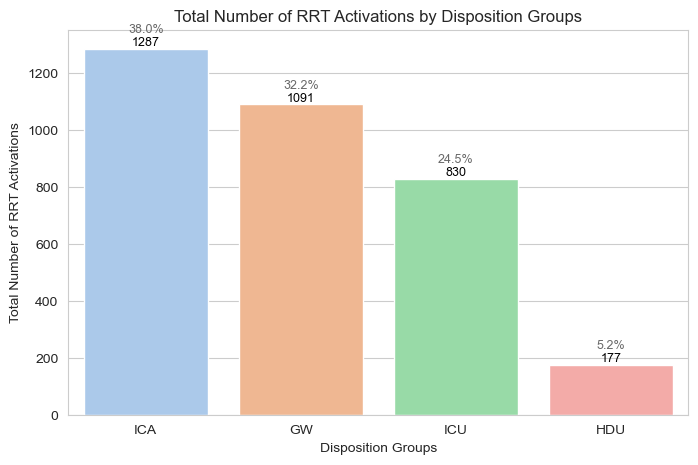

In [72]:
# Plot bar graph to show total number of RRT activations by disposition_group in descending order
# set the figure size
plt.figure(figsize=(8,5))

# create the bar graphs
sns.set_style("whitegrid")
ax = sns.countplot(data=masterfile, x='disposition_group', palette = 'pastel', order = masterfile['disposition_group'].value_counts().index)

# add count and percentage labels on top of each bar
total = float(len(masterfile))
for patch in ax.patches:
    count = int(patch.get_height())
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y_count = patch.get_y() + patch.get_height() + 10 
    y_percentage = y_count + 45 
    ax.annotate(count, (x, y_count), ha='center', fontsize=9, color='black')
    ax.annotate(percentage, (x, y_percentage), ha='center', fontsize=9, color='dimgray')

# add labels and title
plt.xlabel('Disposition Groups')
plt.ylabel('Total Number of RRT Activations')
plt.title('Total Number of RRT Activations by Disposition Groups')

# show the plot
plt.show()

- Most of the disposition of patients after being seen by either the SMART team or HERO team is to the ICA (38.0%), followed by GW (32.2%), ICU (24.5%) and HDU (5.2%).
- There are seven subgroups under ICA while there is only one subgroup under GW, so the subgroup of GW is already a big subgroup by itself.
- More training might have to be provided in terms of early detection of deterioration of health conditions linked to ICA and GW cases to lower the related RRT activations.

#### 5. Total Number of RRT Activations by Outcome

In [45]:
# Look at unique values under 'discharge_type_description' column
masterfile['discharge_type_description'].unique()

array(['Patient Discharged', 'Follow-up at SOC', 'Death',
       'Death - Coroner Case', 'Residential Stepdown Facilities',
       'Transfer to Restructured Hospital', 'Others',
       'Transfer or Discharge to Centres_DisTyp',
       'Discharge against advice', 'Discharge to Private GP/Specialist',
       'AOR -NO SOC F/P', 'Absconded', 'Follow-up at PHC Clinic',
       'Transfer to Private Hospital'], dtype=object)

In [46]:
# Map discharge_type_description to required groups
mappings = {'Patient Discharged':'Discharged', 
            'Follow-up at SOC':'Follow-up at Clinic',
            'Death':'Death',
            'Death - Coroner Case':'Death',
            'Residential Stepdown Facilities':'Residential Stepdown',
            'Transfer to Restructured Hospital':'Transferred to Other Hospitals',
            'Others':'Others',
            'Transfer or Discharge to Centres_DisTyp':'Transferred to Other Hospitals',
            'Discharge against advice':'AOR',
            'Discharge to Private GP/Specialist':'Follow-up at Clinic',
            'AOR -NO SOC F/P':'AOR',
            'Absconded':'Absconded',
            'Follow-up at PHC Clinic':'Follow-up at Clinic',
            'Transfer to Private Hospital':'Transferred to Other Hospitals'}

masterfile['outcome']=masterfile['discharge_type_description'].map(mappings)
masterfile.head()

,case_no,document_name,sgh_disposition,sgh_time_referred,authored_date_time,discharge_type_description,day_of_week,is_in_ph,hours,disposition_group,outcome
0,5690G,MICU Triage Note SGH,Iso ICU,2020-10-07 08:38:00,2020-10-07 10:06:00,Patient Discharged,2,False,office,ICU,Discharged
1,4269F,MICU Triage Note SGH,GW,2020-12-28 16:04:00,2020-12-28 17:02:00,Follow-up at SOC,0,False,non-office,GW,Follow-up at Clinic
2,1225E,MICU Triage Note SGH,GW,2020-09-30 08:48:00,2020-09-30 09:07:00,Follow-up at SOC,2,False,office,GW,Follow-up at Clinic
3,6166C,MICU Triage Note SGH,Iso ICU,2021-03-11 02:55:00,2021-03-11 03:50:00,Death,3,False,non-office,ICU,Death
4,6166C,MICU Triage Note SGH,MICU,2019-05-22 15:43:00,2019-05-22 16:18:00,Death,2,False,office,ICU,Death


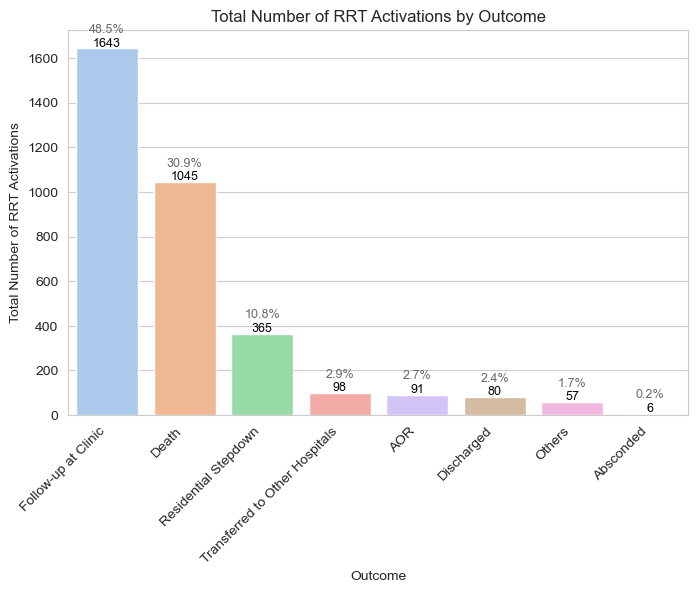

In [68]:
# Plot bar graph to show total number of RRT activations by outcome in descending order
# set the figure size
plt.figure(figsize=(8,5))

# create the bar graphs
sns.set_style("whitegrid")
ax = sns.countplot(data=masterfile, x='outcome', palette = 'pastel', order = masterfile['outcome'].value_counts().index)

# add count and percentage labels on top of each bar
total = float(len(masterfile))
for patch in ax.patches:
    count = int(patch.get_height())
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y_count = patch.get_y() + patch.get_height() + 10
    y_percentage = y_count + 60
    ax.annotate(count, (x, y_count), ha='center', fontsize=9, color='black')
    ax.annotate(percentage, (x, y_percentage), ha='center', fontsize=9, color='dimgray')

# add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Outcome')
plt.ylabel('Total Number of RRT Activations')
plt.title('Total Number of RRT Activations by Outcome')

# show the plot
plt.show()

- The top three outcomes from RRT activations are follow-up at clinic (48.5%), followed by death (30.9%) and residential stepdown (10.8%).
- As such, measures have to be put in place to ensure proper handover to subsequent clinics and specialists so that patients are well-taken care of and prevent duplication of efforts.
- Since death constitute to a fairly large proportion of the outcomes (30.9%), more training have to be conducted to improve the effectiveness of the RRT activations and efficency of early detection in deterioration of health conditions.
- Similarly, measures have to be put in place in ensure proper handover to residential stepdown facilities so that patients' conditions do not worsen.

## Conclusions and Recommendations

**1. Total Number of RRT Activations by Month**
- There is a somewhat similar trend in the total number of RRT activations across the two fiscal years.
- There is a general increasing trend in the first quarter, followed by smaller fluctuations in the second and third quarters, then a decreasing trend in the last quarter of the fiscal year.
- The peaks in the number of RRT activations are in June/July and December/January periods. These coincide with the main school holiday and festive periods in Singapore. Some patients might face more stress during such [festive periods](https://hbr.org/2018/12/holidays-can-be-stressful-they-dont-have-to-stress-out-your-team) resulting in incidences of serious adverse events and RRT activations. Furthermore, there might be a crunch in the hospital manpower, resulting in [patient deterioration not being recognized and responded to in a timely manner](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5221430/) and subsequent RRT activations.

**2. Total Number of RRT Activations by Teams and Month**
- There are generally more RRT activations by SMART team as compared to HERO team. As such, it contributes to the total activations to a larger extent.
- The fluctuations in RRT activations are greater for SMART team as compared to HERO team, with the range in the number of activations by SMART team at 82 and that of HERO team at 28.
- There is a somewhat similar trend in the total number of RRT activations across the two fiscal years by SMART team while that by HERO team is more erratic. As such, the conditions of the patients under the HERO team might be more unstable or the team might have [more reluctance in RRT activations](http://www.smj.org.sg/sites/default/files/SMJ-61-184.pdf) and require more training in it.

**3. Total Number of RRT Activations by Time**
- There are more RRT activations during non-office hours (56.9%) than office hours (43.1%). Below are a few plausible reasons:
  - Non-office hours are proportionally longer than office hours in a day.
  - There is less manpower in the hospital during non-office hours, resulting in patient deterioration not being recognized and responded to in a timely manner and subsequent RRT activations.
  
**4. Total Number of RRT Activations by Disposition**
- Most of the disposition of patients after being seen by either the SMART team or HERO team is to the ICA (38.0%), followed by GW (32.2%), ICU (24.5%) and HDU (5.2%).
- There are seven subgroups under ICA while there is only one subgroup under GW, so the subgroup of GW is already a big subgroup by itself.
- More training might have to be provided in terms of early detection of deterioration of health conditions linked to ICA and GW cases to lower the related RRT activations.

**5. Total Number of RRT Activations by Outcome**
- The top three outcomes from RRT activations are follow-up at clinic (48.5%), followed by death (30.9%) and residential stepdown (10.8%).
- As such, measures have to be put in place to ensure proper handover to subsequent clinics and specialists so that patients are well-taken care of and prevent duplication of efforts.
- Since death constitute to a fairly large proportion of the outcomes (30.9%), more training have to be conducted to improve the effectiveness of the RRT activations and efficency of early detection in deterioration of health conditions.
- Similarly, measures have to be put in place in ensure proper handover to residential stepdown facilities so that patients' conditions do not worsen.